<div style="border:solid green 3px; padding: 20px">

<b>Описание проекта</b>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv (r'C:\Users\kuzmi\Downloads\games.csv')
except:
    df = pd.read_csv ('https://code.s3.yandex.net/datasets/games.csv')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Очень хорошо! Загрузка датасета непосредственно с сервера и все равно от куда запускается тетрадка. 👍</font>

In [3]:
import os
pth1 = '/folder_1/data.csv'
pth2 = '/folder_2/data.csv'
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

Проверьте правильность пути к датасету


In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Дубликаты

In [6]:
df[df.duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


Дубликатов нет

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изменение типа данных

- Год выпуска и оценка критиков дожны быть целыми числами
- Оценка пользователей  - число с плавающей точкой

In [9]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], downcast='integer')#.astype('int64')
df['critic_score'] = pd.to_numeric(df['critic_score'], downcast='integer')
#df['user_score'] = pd.to_numeric(df['user_score'], downcast='float'), errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы видим, что оценка критиков не переводится в тип int. Вероятно, это произошло из-за наличия значений NaN в столбце. Также не переводится столбец оценка пользователей. Потом вернемся к этой проблеме

### Пропуски

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df['year_of_release'].isna().sum() / len(df)

0.01609332934489979

Удалим по два пропуска в столбце name и genre, также 269 пропусков в столбце год выпуска игры (1,6%). Оценки критиков и пользователей, также рейтинг удалять нельзя, надо посмотреть на них поближе

In [12]:
df.dropna(subset = ['name'], inplace=True)
df['name'].isna().sum()

0

In [13]:
df.dropna(subset = ['genre'], inplace=True)
df['genre'].isna().sum()

0

In [14]:
df.dropna(subset = ['year_of_release'], inplace=True)
df['year_of_release'].isna().sum()

0

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура 'tbd' означает 'to be decided'/'to be defined'(предстоит решить/предстоит определить). На данный момент это пропуск в данных. Заменим на NaN

In [17]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [18]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

К-А - сейчас называется Е, заменим. Все остальное оставим без изменений

In [19]:
df['rating'] = df['rating'].replace('K-A', 'E')

Теперь опять попробуем изменить тип данных в столбцах оценка критиков и оценка пользователей

In [20]:
#df['critic_score'] = pd.to_numeric(df['critic_score'], downcast='integer', errors='coerce').astype('int64')
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float', errors='coerce').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Из-за NaN столбец 'critic_score' не переводится в integer. Оставим, как есть

### Суммарные продажи во всех регионах

In [21]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Возможные причины пропусков: 

- год выпуска. Данные были утеряны, сложно/невозможно их восстановить
- оценки критиков и пользователей. Некоторые игры не попадают в поле зрения критиков и пользователей
- рейтинг. Здесь используется американская рейтинговая система ESRB, поэтому рейтинг может отсуствовать у игр, не предназначенных для продажи в США (и не выпущенных там). В Японии и Европе свои рейтинговые системы(CERO и PEGI)

In [22]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-

### Выпуск игр за разные годы

In [23]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

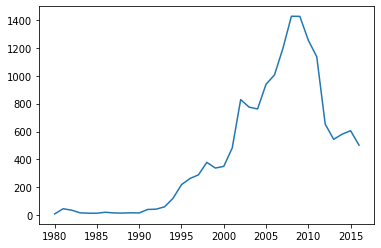

In [24]:
plt.plot(df.groupby('year_of_release')['name'].count());

Начиная с 1990 года происходит довольно крутой подъем выпуска новых игр, который достигает пика в 2008-2009 гг, затем резкий спад.

### Продажи по платформам

In [25]:
platform_sales_pivot_table = pd.pivot_table(df, index=['platform'], values='all_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('all_sales',ascending=False)
platform_sales_pivot_table

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем первые шесть платформ для анализа

In [26]:
best_sales_platforms = list(platform_sales_pivot_table.index[:6])
best_sales_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Срок жизни платформы PS2 в годах:             11.0


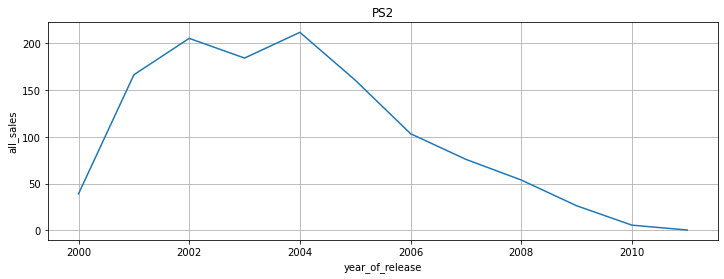

Срок жизни платформы X360 в годах:             11.0


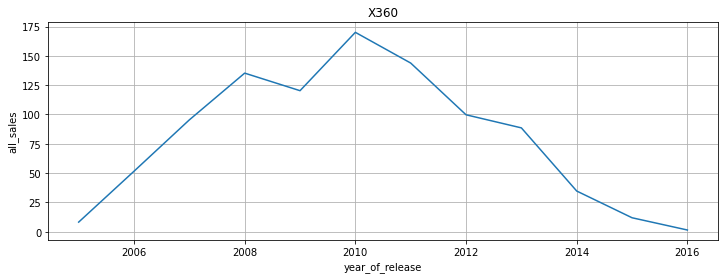

Срок жизни платформы PS3 в годах:             10.0


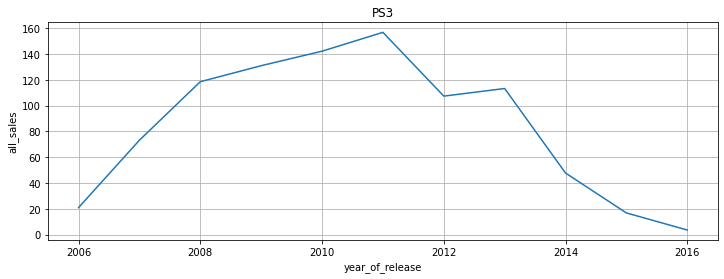

Срок жизни платформы Wii в годах:             10.0


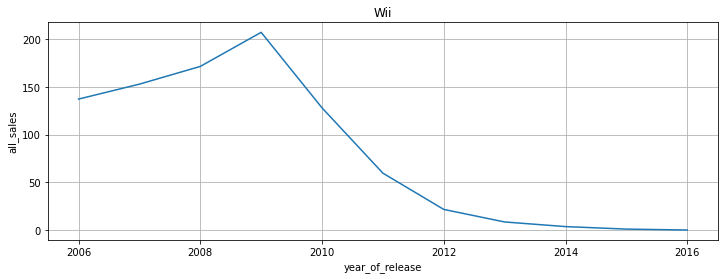

Срок жизни платформы DS в годах:             28.0


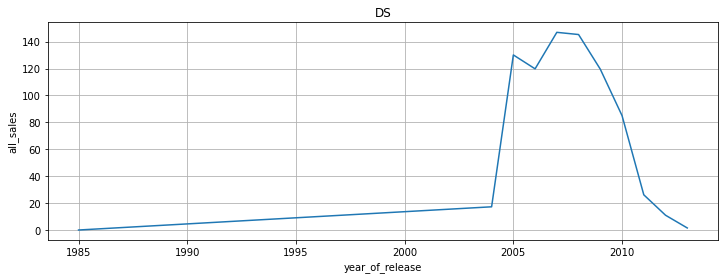

Срок жизни платформы PS в годах:             9.0


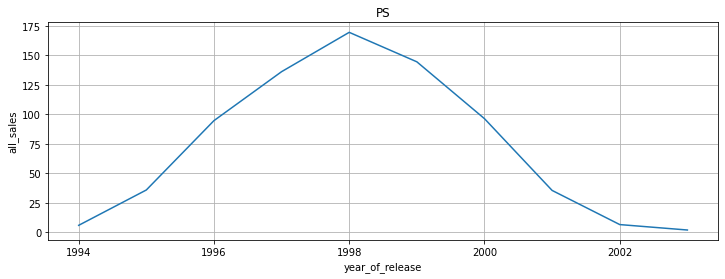

In [27]:
for i in best_sales_platforms:
    print(f"Срок жизни платформы {i} в годах: \
            {df[df['platform'] == i]['year_of_release'].max() - df[df['platform'] == i]['year_of_release'].min()}")
    plt.figure(figsize=(12,4))
    df[df['platform'] == i].groupby('year_of_release')['all_sales'].sum().plot()
    plt.title(i)
    plt.ylabel('all_sales')
    plt.grid()
    plt.show();

Платформы в основном живут 10 лет, при этом периоды максимальных продаж приходятся в основном на периоды длиной 4-5 лет.

Исходя из проведенного анализа, в качестве актуального для прогноза на 2017 год, определим период c 2012 по 2016 гг. Дальнейший анализ будем проводить для этого периода.

### Данные за актуальный период

In [28]:
df = df.query('year_of_release > 2012')

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [30]:
best_sales_platforms = pd.pivot_table(df, index=['platform','year_of_release'], 
                                     values='all_sales', aggfunc = 'sum')
best_sales_platforms

all_sales
platform year_of_release           
3DS      2013.0               56.57
         2014.0               43.76
         2015.0               27.78
         2016.0               15.14
DS       2013.0                1.54
PC       2013.0               12.38
         2014.0               13.28
         2015.0                8.52
         2016.0                5.25
PS3      2013.0              113.25
         2014.0               47.76
         2015.0               16.82
         2016.0                3.60
PS4      2013.0               25.99
         2014.0              100.00
         2015.0              118.90
         2016.0               69.25
PSP      2013.0                3.14
         2014.0                0.24
         2015.0                0.12
PSV      2013.0               10.59
         2014.0               11.90
         2015.0                6.25
         2016.0                4.25
Wii      2013.0                8.59
         2014.0                3.75
         2015.0                1.14
         2016.0                0.18
WiiU     2013.0               21.65
         2014.0               22.03
         2015.0               16.35
         2016.0                4.60
X360     2013.0               88.58
         2014.0               34.74
         2015.0               11.96
         2016.0                1.52
XOne     2013.0               18.96
         2014.0               54.07
         2015.0               60.14
         2016.0               26.15

In [31]:
best_sales_platforms = pd.pivot_table(df, index='platform', 
                                     values='all_sales', aggfunc = 'sum')
best_sales_platforms_table = best_sales_platforms.sort_values('all_sales', ascending=False)
best_sales_platforms_table

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


На рынке лидируют 5 плаформ: PS4, PS3, XOne, X360 и 3DS. Посмотрим, как они себя ведут: растут или падают

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

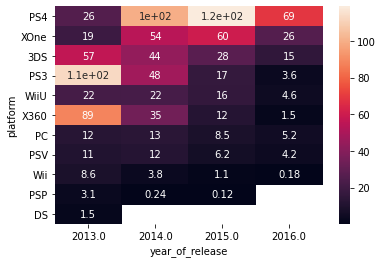

In [32]:
sns.heatmap(df.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum').sort_values(by=2015, ascending=False), annot=True)

На графике видно, что больше всего продаж и рост у PS4 и XOne, причем с большим отрывом лидирует первая. За 2016 год данные не полные, это мы учитываем

### Глобальные продажи игр ("ящик с усами")

In [33]:
df = df.query('2012 < year_of_release')

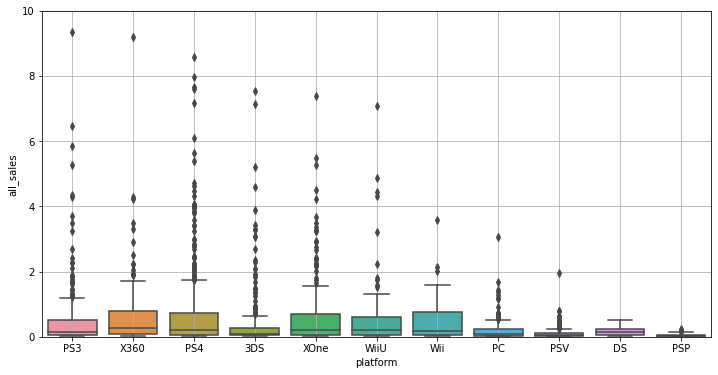

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['all_sales'], x=df['platform'])
plt.ylim(0,10)
plt.grid()

Практически по всем платформам распределение игр по суммарным продажам имеет сильную ассиметрию и скос вправо с большим количеством "выбросов", т.е. некоторые игры обеспечивают продажи, существенно превышающую средние значения. Наибольший правый хвост у платформ PS4 и XOne, несколько ниже у X360, PS3 и Wii.

### Влияние отзывов пользователей и критиков

In [35]:
ps4 = df.query('platform == "PS4"')
ps3 = df.query('platform == "PS3"')
xone = df.query('platform == "XOne"')
ds = df.query('platform == "3DS"')
x360 = df.query('platform == "X360"')

Корреляция между критическими отзывами: 0.406567902061781


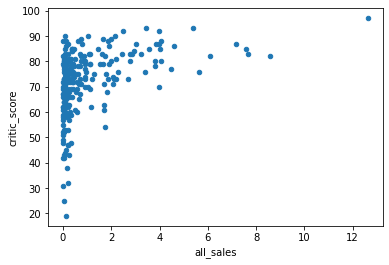

In [36]:
print("Корреляция между критическими отзывами:", ps4['all_sales'].corr(ps4['critic_score']))
ps4.plot.scatter(x='all_sales', y='critic_score');

Корреляция между отзывами пользователей: -0.031957109005188264


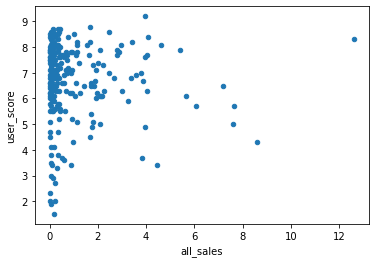

In [37]:
print("Корреляция между отзывами пользователей:", ps4['all_sales'].corr(ps4['user_score']))
ps4.plot.scatter(x='all_sales', y='user_score');

Корреляция между отзывами пользователей: 0.0023944009618447675


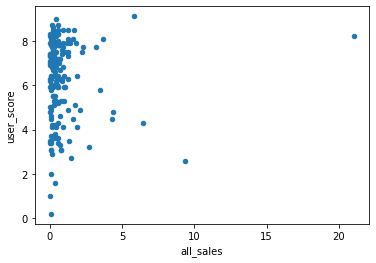

In [38]:
print("Корреляция между отзывами пользователей:", ps3['all_sales'].corr(ps3['user_score']))
ps3.plot.scatter(x='all_sales', y='user_score');

Корреляция между критическими отзывами: 0.3342853393371919


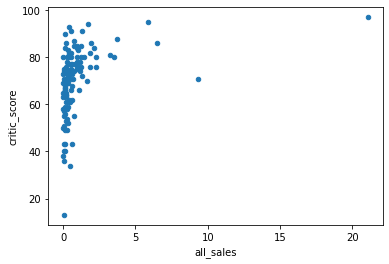

In [39]:
print("Корреляция между критическими отзывами:", ps3['all_sales'].corr(ps3['critic_score']))
ps3.plot.scatter(x='all_sales', y='critic_score');

Корреляция между отзывами пользователей: -0.06892505319711208


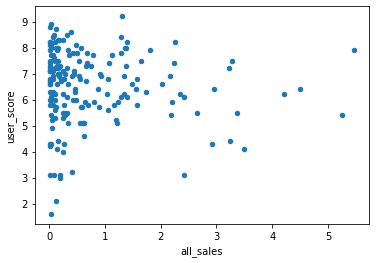

In [40]:
print("Корреляция между отзывами пользователей:", xone['all_sales'].corr(xone['user_score']))
xone.plot.scatter(x='all_sales', y='user_score');

Корреляция между критическими отзывами: 0.41699832800840175


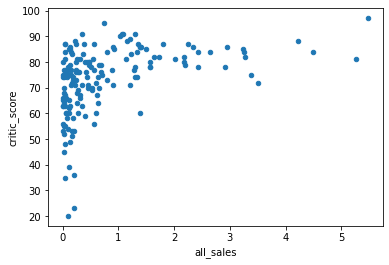

In [41]:
print("Корреляция между критическими отзывами:", xone['all_sales'].corr(xone['critic_score']))
xone.plot.scatter(x='all_sales', y='critic_score');

Корреляция между отзывами пользователей: 0.24150410134889128


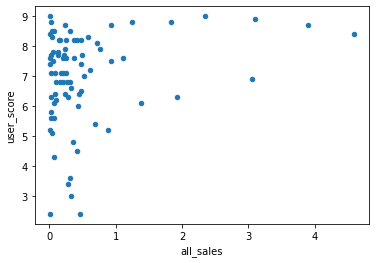

In [42]:
print("Корреляция между отзывами пользователей:", ds['all_sales'].corr(ds['user_score']))
ds.plot.scatter(x='all_sales', y='user_score');

Корреляция между критическими отзывами: 0.35705661422881035


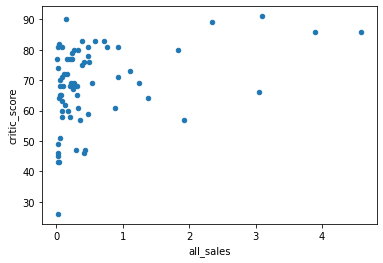

In [43]:
print("Корреляция между критическими отзывами:", ds['all_sales'].corr(ds['critic_score']))
ds.plot.scatter(x='all_sales', y='critic_score');

Корреляция между отзывами пользователей: -0.011742173023024483


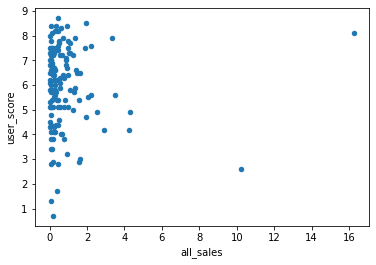

In [44]:
print("Корреляция между отзывами пользователей:", x360['all_sales'].corr(x360['user_score']))
x360.plot.scatter(x='all_sales', y='user_score');

Корреляция между критическими отзывами: 0.3503445460228664


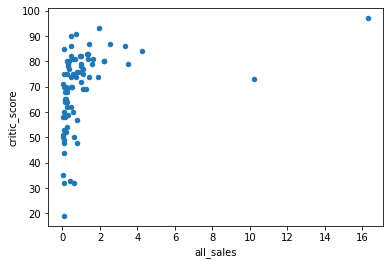

In [45]:
print("Корреляция между критическими отзывами:", x360['all_sales'].corr(x360['critic_score']))
x360.plot.scatter(x='all_sales', y='critic_score');

Корреляция между отзывами критиков и объемом продаж гораздо сильнее, чем между оценками пользователей

3DS


user_score    0.241504
all_sales     1.000000
Name: all_sales, dtype: float64

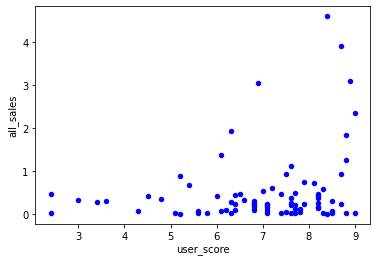

critic_score    0.357057
all_sales       1.000000
Name: all_sales, dtype: float64

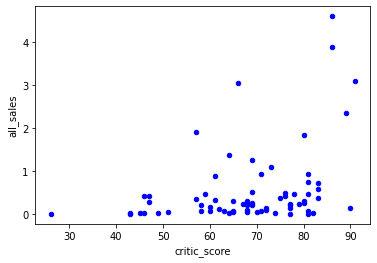

DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PC


user_score   -0.093842
all_sales     1.000000
Name: all_sales, dtype: float64

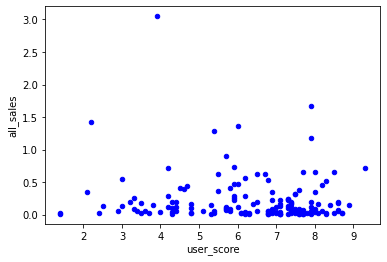

critic_score    0.19603
all_sales       1.00000
Name: all_sales, dtype: float64

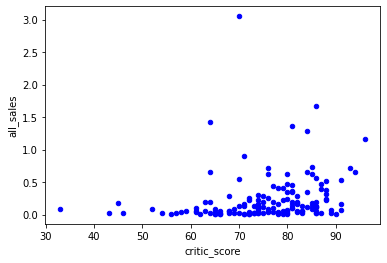

PS3


user_score    0.002394
all_sales     1.000000
Name: all_sales, dtype: float64

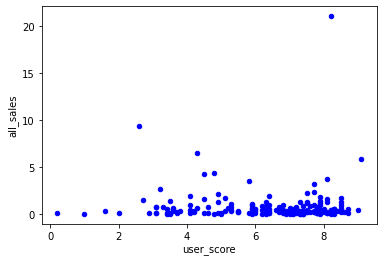

critic_score    0.334285
all_sales       1.000000
Name: all_sales, dtype: float64

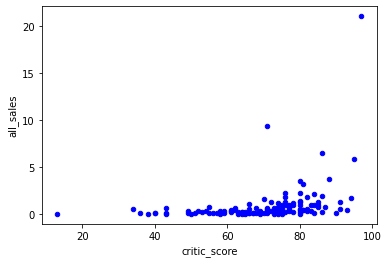

PS4


user_score   -0.031957
all_sales     1.000000
Name: all_sales, dtype: float64

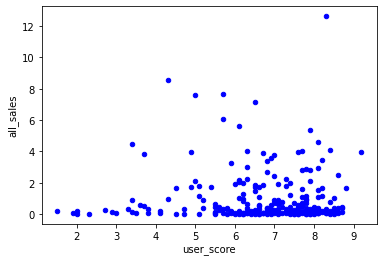

critic_score    0.406568
all_sales       1.000000
Name: all_sales, dtype: float64

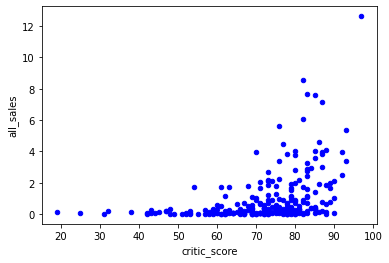

PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PSV


user_score    0.000942
all_sales     1.000000
Name: all_sales, dtype: float64

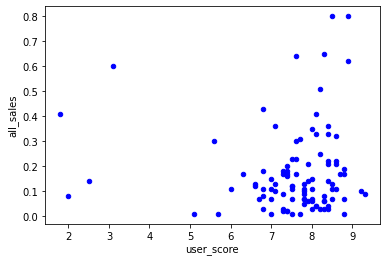

critic_score    0.254742
all_sales       1.000000
Name: all_sales, dtype: float64

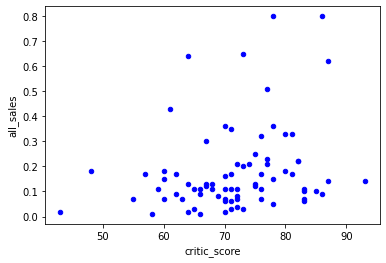

Wii


user_score    0.682942
all_sales     1.000000
Name: all_sales, dtype: float64

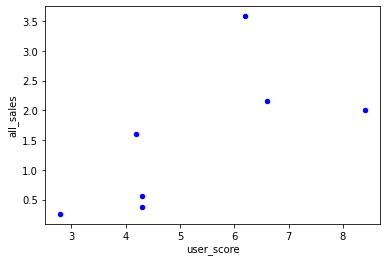

Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
WiiU


user_score    0.41933
all_sales     1.00000
Name: all_sales, dtype: float64

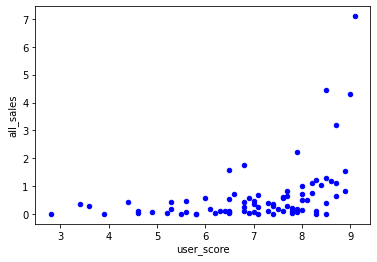

critic_score    0.376415
all_sales       1.000000
Name: all_sales, dtype: float64

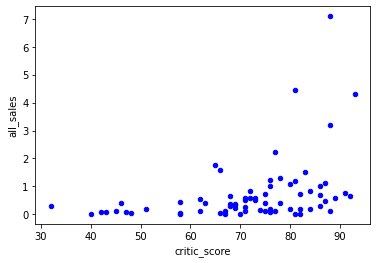

X360


user_score   -0.011742
all_sales     1.000000
Name: all_sales, dtype: float64

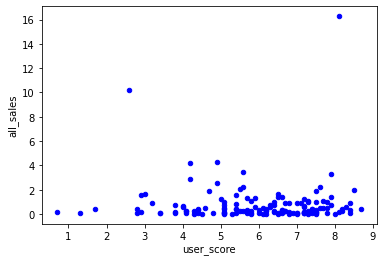

critic_score    0.350345
all_sales       1.000000
Name: all_sales, dtype: float64

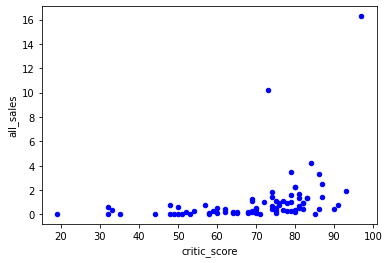

XOne


user_score   -0.068925
all_sales     1.000000
Name: all_sales, dtype: float64

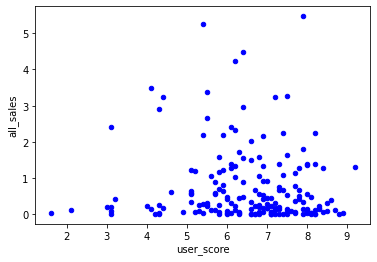

critic_score    0.416998
all_sales       1.000000
Name: all_sales, dtype: float64

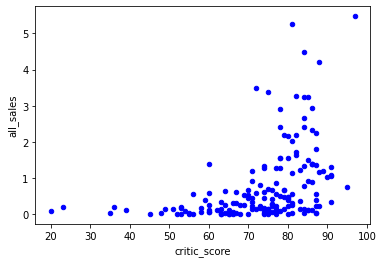

In [46]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
df_sc, y = df.copy(), 'all_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

### Жанры игр

In [47]:
genre_pivot_table = pd.pivot_table(df, index='genre', values='all_sales', aggfunc='sum')
genre_pivot_table.sort_values('all_sales', ascending=False)

,all_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Самые прибыльные жанры: экшн, шутер, ролевые игры и спортивные игры. С большим отрывом лидирует экшн

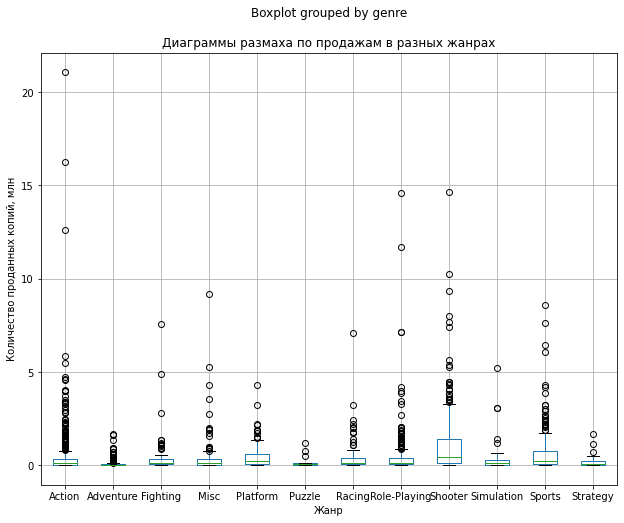

In [48]:
(df[['all_sales', 'genre']].boxplot(column='all_sales', by='genre', figsize=(10,8))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()

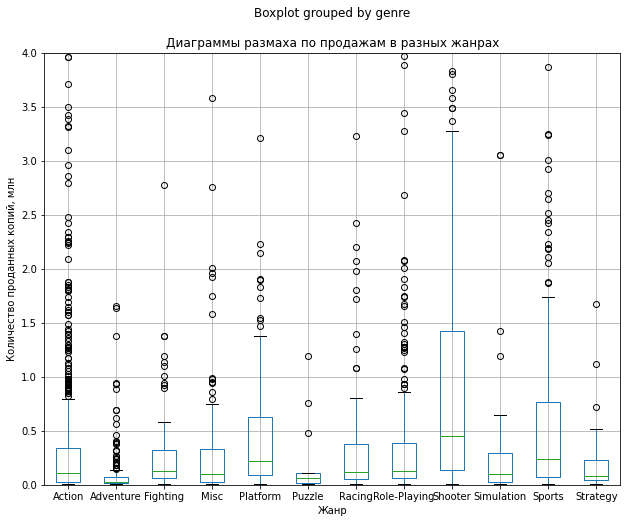

In [49]:
(df[['all_sales', 'genre']].boxplot(column='all_sales', by='genre', figsize=(10,8))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.show()

Здесь видно, что по медианным продажам лидируют шутеры.

### Портрет пользователя

#### Топ-5 популярных платформ

In [50]:
top_5_na_platforms = df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
top_5_eu_platforms = df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
top_5_jp_platforms = df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')

In [51]:
top_5_na_platforms.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [52]:
top_5_eu_platforms.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [53]:
top_5_jp_platforms.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


В Америке и Европе лидирует РS4, в Японии абсолютный чемпион - 3DS

#### Топ-5 популярных жанров

In [54]:
top_5_na_genres = df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
top_5_eu_genres = df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
top_5_jp_genres = df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')

In [55]:
top_5_na_genres.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [56]:
top_5_eu_genres.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [57]:
top_5_jp_genres.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


В Америке и Европе лидируют экшн и шутеры, в Японии - ролевые игры

### Влияние рейтинга ESRB

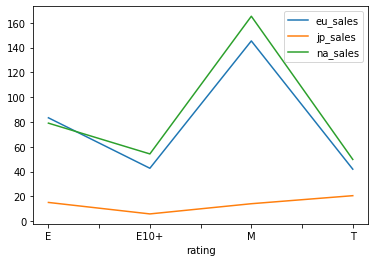

In [58]:
df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot();

Америка и Европа предпочитают игры категории М, в Японии востребованы игры всех жанров

In [59]:
# Комментарий ревьюера
temp = df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

977 0.43752798925212716


M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [60]:
df['rating'].fillna(value='NoESRB', inplace=False).value_counts()

NoESRB    977
M         369
T         333
E         302
E10+      252
Name: rating, dtype: int64

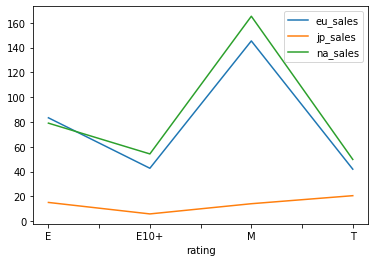

In [61]:
df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot();

На графике мы видим, что бОльшая часть игр в Японии не имеет рейтинга ESRB, т.к. в Японии игры классифицируются в соответствии с собственным рейтингом (CERO). Поэтому выводы о связи рейтинга и количества продаж игр в Японии не релевантны.

### Проверка гипотез

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги не отличаются

Альтернативная гипотеза: Средние пользовательские рейтинги разные

Значение критического уровня значимости (альфа) примем 0.05 (5%)

Пропущенные значения отфильтруем

In [62]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df[(df.platform == "XOne") & (df.user_score.notna())]['user_score'], 
    df[(df.platform == "PC") & (df.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.1401266165532671
Не получилось отвергнуть нулевую гипотезу


Первая гипотеза подтвердилась

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги не отличаются

Альтернативная гипотеза: Средние пользовательские рейтинги разные

Значение критического уровня значимости (альфа) примем 0.05 (5%)

Пропущенные значения отфильтруем

In [63]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df[(df.genre == "Action") & (df.user_score.notna())]['user_score'], 
    df[(df.genre == "Sports") & (df.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517817316679538e-27
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась

Пользовательские рейтинги (оценки) не зависят от платформы, но зависят от жанра игры

## Общий вывод

Основными регионами продажи игр - Европа и Северная Америка. Выбраны два потенциально прибыльных платформы - PS4 и XOne, также и 3DS (если ориентироваться на японский рынок). Наиболее популярными жанрами в Европе и Северной Америке являются Action и Shooter, в Японии - Role-Playing. Предпочтения американских и европейских пользователей в основном совпадают, для японских пользователей характерна своя специфика. С учетом того, что популярность платформ достаточно быстро меняется, необходимо мониторить состояние рынка с целью своевременного реагирования на изменения пользовательских предпочтений. Продажи игр сильнее коррелируют с оценкой критиков, чем с оценками пользователей. При этом оценки пользователкй зависят не от платформы, а от жанра.